In [22]:
import sys
sys.path.append('../')
sys.path.append('/Users/sdbykov/work/my_packages/nway')

In [23]:
from scripts.utils import data_path, set_mpl
from scripts.cross_match_scripts import pandas_to_fits, fits_to_pandas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Chandra/XMM with DESI 

,srcname_fin,csc_name,csc_ra,csc_dec,csc_err_ellipse_r0,csc_err_ellipse_r1,csc_sigma,csc_pos_r98,csc_FLUX_05_2,csc_flux_aper_sm_err,csc_likelihood,csc_likelihood_class,sep_ero_csc,sep_csc_desi,release,brickid,objid,ra,dec,desi_id,IDSRC_desi_id,ero_flux_05-20,ero_pos_r98,ero_pos_sigma_2d,ero_RA_fin,ero_DEC_fin,ero_DET_LIKE_0,csc_ero_flux_ratio
0,SRGe J105316.7+573551,2CXO J105316.7+573550,163.319906,57.597453,0.712676,0.711335,0.411369,1.150662,NaN,NaN,15055.956674,TRUE,0.970884,0.144735,9011,609950,3809,163.319852,57.597425,9011_609950_3809,SRGe J105316.7+573551_9011_609950_3809,1.327770e-13,2.276231,0.813768,163.319421,57.597379,2174.8645,NaN
1,SRGe J105335.1+572543,2CXO J105335.0+572541,163.395863,57.428329,0.740180,0.718313,0.421378,1.178657,NaN,NaN,5957.706781,TRUE,1.062877,0.241237,9011,609951,491,163.395958,57.428372,9011_609951_491,SRGe J105335.1+572543_9011_609951_491,7.887368e-14,2.442085,0.873062,163.396337,57.428477,1026.8735,NaN
2,SRGe J105432.1+580046,2CXO J105432.2+580047,163.634353,58.013174,0.856368,0.759133,0.467532,1.307756,0.0,1.382023e-14,654.613560,TRUE,1.697386,0.261635,9011,611496,691,163.634295,58.013108,9011_611496_691,SRGe J105432.1+580046_9011_611496_691,6.718623e-14,2.608968,0.932724,163.633625,58.012903,942.2203,0.0


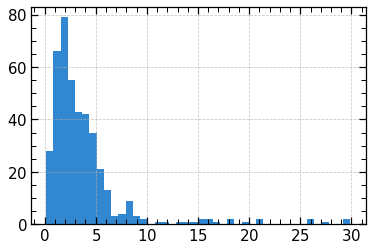

In [24]:
csc_ctps = pd.read_csv(data_path+'ero_csc_desi.csv')
plt.hist(csc_ctps.sep_ero_csc)
csc_ctps.head(3)

,srcname_fin,xmm_SRCID,xmm_SC_RA,xmm_SC_DEC,xmm_SC_POSERR,xmm_sigma,xmm_pos_r98,xmm_FLUX_05_2,xmm_FLUX_05_2_err,xmm_SC_DET_ML,xmm_SC_VAR_FLAG,xmm_SC_SUM_FLAG,xmm_SC_EXT_ML,xmm_SC_EXTENT,xmm_SC_EXT_ERR,xmm_SC_FVAR,xmm_SC_FVARERR,xmm_CONFUSED,sep_ero_xmm,sep_xmm_desi,release,brickid,objid,ra,dec,desi_id,IDSRC_desi_id,ero_flux_05-20,ero_pos_r98,ero_pos_sigma_2d,ero_RA_fin,ero_DEC_fin,ero_DET_LIKE_0,xmm_ero_flux_ratio
0,SRGe J104117.7+584929,205562112010003,160.324685,58.824762,0.817968,0.580060,1.622515,8.770400e-14,6.519681e-15,742.578,False,0,-2.27685,0.0,NaN,0.012697,1.426367,False,2.015272,0.975167,9011,613766,43,160.324219,58.824639,9011_613766_43,SRGe J104117.7+584929_9011_613766_43,1.817271e-13,2.166339,0.774481,160.323629,58.824642,3391.8890,0.482614
1,SRGe J103618.3+581246,205562110010001,159.076917,58.213093,0.568896,0.403431,1.128458,1.677284e-13,8.215893e-15,1899.140,False,0,-2.90832,0.0,NaN,0.087740,0.112042,False,1.987860,1.384893,9011,612250,2743,159.076381,58.212831,9011_612250_2743,SRGe J103618.3+581246_9011_612250_2743,1.704142e-13,2.166670,0.774599,159.076205,58.212688,3020.2393,0.984240
2,SRGe J105316.7+573551,201237001010003,163.319955,57.597429,0.077942,0.055272,0.154605,9.493300e-14,5.897774e-16,20363.300,False,1,-2.54092,0.0,NaN,0.306044,0.073647,False,1.045047,0.199473,9011,609950,3809,163.319852,57.597425,9011_609950_3809,SRGe J105316.7+573551_9011_609950_3809,1.327770e-13,2.276231,0.813768,163.319421,57.597379,2174.8645,0.714981


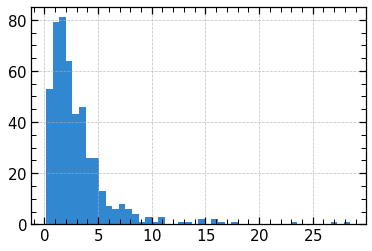

In [25]:
xmm_ctps = pd.read_csv(data_path+'ero_xmm_desi.csv')
plt.hist(xmm_ctps.sep_ero_xmm)
xmm_ctps.head(3)

flux ratio filter

In [26]:
xmm_ctps = xmm_ctps[xmm_ctps['xmm_ero_flux_ratio'] <  5 ]
xmm_ctps = xmm_ctps[xmm_ctps['xmm_ero_flux_ratio'] >  1/5 ]

csc_ctps = csc_ctps[csc_ctps['csc_ero_flux_ratio'] <  5 ]
csc_ctps = csc_ctps[csc_ctps['csc_ero_flux_ratio'] >  1/5 ]

distance filter

In [27]:
#csc_ctps = csc_ctps.query('sep_ero_csc < ero_pos_r98')[['srcname_fin','desi_id', 'sep_xmm_desi',]]
#xmm_ctps = xmm_ctps.query('sep_ero_xmm < ero_pos_r98 ')[['srcname_fin','desi_id', sep_csc_desi',]]
xmm_ctps = xmm_ctps[['srcname_fin','desi_id',]]
csc_ctps = csc_ctps[['srcname_fin','desi_id',]]

In [35]:
finall_ctps = pd.concat([xmm_ctps, csc_ctps])
finall_ctps.sort_values(by='srcname_fin', inplace=True)

n_ctps = finall_ctps.groupby('srcname_fin')['desi_id'].transform(lambda x: len(x.unique())) #Number of XMM and Chandra CTPs per ero source
finall_ctps['n_desi'] = n_ctps

finall_ctps = finall_ctps[finall_ctps.n_desi == 1]
finall_ctps.drop_duplicates(subset='srcname_fin', inplace=True)
finall_ctps.rename(columns={'srcname_fin':'ID'}, inplace=True)
finall_ctps.rename(columns={'desi_id':'desi_id_true_ctp'}, inplace=True)
finall_ctps.drop(['n_desi'], axis=1, inplace=True)
#finall_ctps.ID = finall_ctps.ID.str.encode('utf-8')
#finall_ctps.desi_id_true_ctp = finall_ctps.desi_id_true_ctp.str.encode('utf-8')
# merge sep_xmm_desi and sep_csc_desi to one column
#add hostless
#hostless_ero = pd.read_pickle(data_path+'validation_ctps_ero_desi_lh_hostless.pkl')
#finall_ctps.to_pickle(data_path+'validation_ctps_ero_desi_lh.pkl')

#finall_ctps = pd.concat([finall_ctps, hostless_ero])
#print(len(finall_ctps))
#finall_ctps.sample(20)
finall_ctps

,ID,desi_id_true_ctp
368,SRGe J103105.9+573747,9011_610714_1440
257,SRGe J103118.8+574434,9011_610714_1908
48,SRGe J103123.8+574309,9011_610714_2092
284,SRGe J103130.8+573932,9011_610714_2412
173,SRGe J103137.0+573159,9011_609939_1093
...,...,...
129,SRGe J110633.0+590313,9011_614527_1198
193,SRGe J110645.0+590331,9011_614527_1596
169,SRGe J110648.4+585514,9011_614527_1704
73,SRGe J110721.2+585635,9011_614527_2647


In [29]:
# print(len(finall_ctps.query("desi_id_true_ctp!=b'hostless' & ~sep_xmm_desi.isna() & sep_csc_desi.isna()")))
# print(len(finall_ctps.query("desi_id_true_ctp!=b'hostless' & sep_xmm_desi.isna() & ~sep_csc_desi.isna()")))
# print(len(finall_ctps.query("desi_id_true_ctp!=b'hostless' & sep_xmm_desi.isna() & sep_csc_desi.isna()")))
# print(len(finall_ctps.query("desi_id_true_ctp!=b'hostless'")))

In [30]:
finall_ctps

,ID,desi_id_true_ctp
368,SRGe J103105.9+573747,9011_610714_1440
257,SRGe J103118.8+574434,9011_610714_1908
48,SRGe J103123.8+574309,9011_610714_2092
284,SRGe J103130.8+573932,9011_610714_2412
173,SRGe J103137.0+573159,9011_609939_1093
...,...,...
129,SRGe J110633.0+590313,9011_614527_1198
193,SRGe J110645.0+590331,9011_614527_1596
169,SRGe J110648.4+585514,9011_614527_1704
73,SRGe J110721.2+585635,9011_614527_2647


In [37]:
from scripts.cross_match_scripts import rayleigh_plot, add_separation_columns
ero_df = pd.read_pickle(data_path+'ERO_lhpv_03_23_sd01_a15_g14.pkl') #TODO note the ero catalog that you are using!
desi = pd.read_pickle(data_path+'desi_lh.gz_pkl', compression='gzip')

ctps_xray = finall_ctps.copy()
ctps_xray.rename(columns={'ID': 'srcname_fin', 'desi_id_true_ctp':'desi_id'}, inplace=True)

ctps_xray = ctps_xray.merge(ero_df[['srcname_fin', 'RA_fin', 'DEC_fin', 'pos_sigma_2d']], on='srcname_fin', how='left')
ctps_xray = ctps_xray.merge(desi[['desi_id', 'ra', 'dec']], on='desi_id', how='left')
ctps_xray = add_separation_columns(ctps_xray, colname_ra1 = 'RA_fin', colname_dec1 = 'DEC_fin', colname_ra2 = 'ra', colname_dec2 = 'dec', colname = 'sep_ero_desi')


ctps_xray

,srcname_fin,desi_id,RA_fin,DEC_fin,pos_sigma_2d,ra,dec,sep_ero_desi
0,SRGe J103105.9+573747,9011_610714_1440,157.774385,57.629820,2.927322,157.774282,57.630173,1.288998
1,SRGe J103118.8+574434,9011_610714_1908,157.828454,57.742797,2.953216,157.827966,57.742890,0.994579
2,SRGe J103123.8+574309,9011_610714_2092,157.849052,57.719110,1.194977,157.848257,57.719498,2.070640
3,SRGe J103130.8+573932,9011_610714_2412,157.878489,57.658958,3.460543,157.880032,57.659682,3.952662
4,SRGe J103137.0+573159,9011_609939_1093,157.904134,57.532955,2.291806,157.904358,57.533253,1.154828
...,...,...,...,...,...,...,...,...
692,SRGe J110633.0+590313,9011_614527_1198,166.637537,59.053617,7.192980,166.637299,59.052750,3.150115
693,SRGe J110645.0+590331,9011_614527_1596,166.687525,59.058674,5.037064,166.687325,59.058440,0.920125
694,SRGe J110648.4+585514,9011_614527_1704,166.701535,58.920668,3.815435,166.701968,58.921308,2.442214
695,SRGe J110721.2+585635,9011_614527_2647,166.838423,58.943119,3.226814,166.833841,58.942952,8.530671


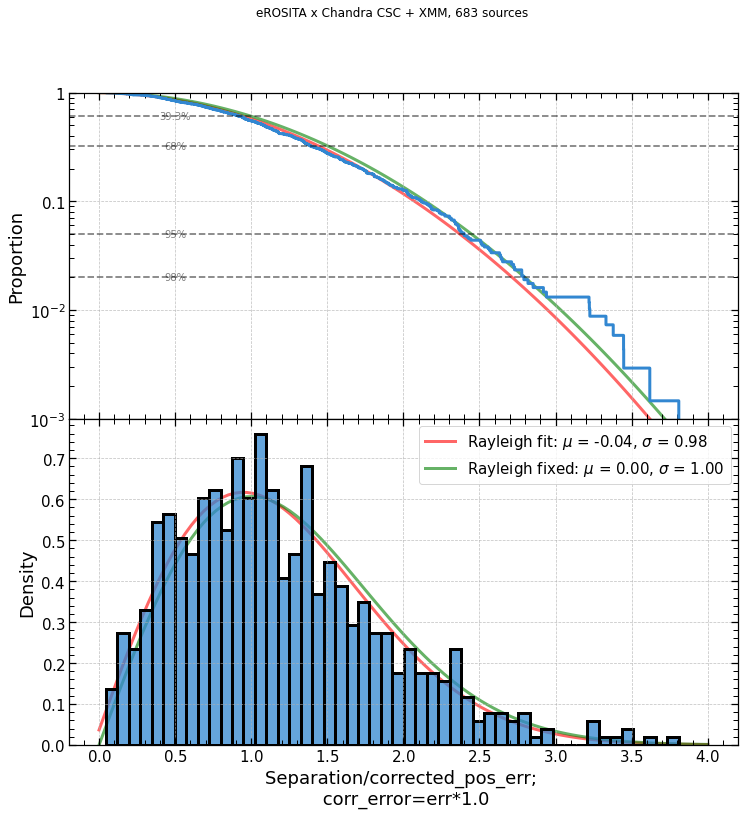

In [39]:
rayleigh_plot(ctps_xray.query("sep_ero_desi/pos_sigma_2d<4"), sep_col='sep_ero_desi', pos_err_col = 'pos_sigma_2d', plotlabel='eROSITA x Chandra CSC + XMM')


# Only X-ray companions for eROSITA

In [18]:
ctps_xray = pd.read_csv(data_path+'ero_xmm_csc_30sec.csv')

def calc_xmm_csc_sep(row):
    ra_csc = 'csc_ra'
    dec_csc = 'csc_dec'
    err_csc = 'csc_pos_r98'
    ra_xmm = 'xmm_SC_RA'
    dec_xmm = 'xmm_SC_DEC'
    err_xmm = 'xmm_pos_r98'


    #calc_sep = (~pd.isna(row[ra_csc])) and (~pd.isna(row[ra_xmm]))
    #calc_sep = (~pd.isna(row[ra_csc])) * (~pd.isna(row[ra_xmm]))
    calc_sep = row[ra_csc] > 0 and row[ra_xmm] > 0
    if not calc_sep:
        row['sep_xmm_csc'] = np.nan
        row['sep_xmm_csc_is_sign'] = False
        if pd.isna(row[ra_xmm]):
            row['final_sep'] = row['sep_ero_csc']
        elif pd.isna(row[ra_csc]):
            row['final_sep'] = row['sep_ero_xmm']
        else:
            pass
        return row
        
    if calc_sep:
        mean_sq_err = (row[err_csc]**2 + row[err_xmm]**2)**0.5/2
        ra_diff = row[ra_csc] - row[ra_xmm]
        dec_diff = row[dec_csc] - row[dec_xmm]
        sep = (ra_diff**2 + dec_diff**2)**0.5
        #sep from deg to arcsec
        sep = sep*3600
        sep_is_sign = sep>mean_sq_err*2
        row['sep_xmm_csc'] = sep
        row['sep_xmm_csc_is_sign'] = sep_is_sign
        row['final_sep'] = row['sep_ero_csc']
        return row

ctps_xray['sep_xmm_csc'] = np.nan
ctps_xray['sep_xmm_csc_is_sign'] = False
ctps_xray['final_sep'] = np.nan
ctps_xray = ctps_xray.apply(lambda row: calc_xmm_csc_sep(row), axis=1)

ctps_xray = ctps_xray[ctps_xray['sep_xmm_csc_is_sign'] == False]
ctps_xray = ctps_xray.query('~pos_r98.isna()')
ctps_xray = ctps_xray.query('final_sep<10')
ctps_xray = ctps_xray.query('ero2csc_flux_ratio<5 | ero2xmm_flux_ratio<5')
ctps_xray = ctps_xray.query('ero2csc_flux_ratio>1/5 | ero2xmm_flux_ratio>1/5')


ctps_xray

,srcname_fin,RA_fin,DEC_fin,flux_05-20,pos_sigma_2d,pos_r98,DET_LIKE_0,EXT_LIKE,pos_r98_corr,csc_name,csc_ra,csc_dec,csc_err_ellipse_r0,csc_err_ellipse_r1,csc_sigma,csc_pos_r98,csc_flux_05_2,csc_flux_aper_sm_err,csc_likelihood,csc_likelihood_class,csc_conf_flag,csc_GroupID,csc_GroupSize,sep_ero_csc,ero2csc_flux_ratio,xmm_SRCID,xmm_SC_RA,xmm_SC_DEC,xmm_SC_POSERR,xmm_sigma,xmm_pos_r98,xmm_flux_05_2,xmm_flux_05_2_err,xmm_SC_DET_ML,xmm_SC_VAR_FLAG,xmm_SC_SUM_FLAG,xmm_SC_EXT_ML,xmm_SC_EXTENT,xmm_SC_EXT_ERR,xmm_SC_FVAR,xmm_SC_FVARERR,xmm_CONFUSED,xmm_GroupID,xmm_GroupSize,sep_ero_xmm,ero2xmm_flux_ratio,sep_xmm_csc,sep_xmm_csc_is_sign,final_sep
0,SRGe J110242.6+594120,165.677384,59.688978,1.420726e-13,2.736290,7.653812,211.181180,0.0,8.419194,2CXO J110242.8+594122,165.678600,59.689447,2.291189,2.008557,1.244794,3.481875,2.196054e-13,2.554235e-14,629.754672,TRUE,False,NaN,1.0,2.779278,0.646945,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,2.779278
1,SRGe J105316.7+573551,163.319421,57.597379,1.327770e-13,0.813768,2.276231,2174.864500,0.0,5.000000,2CXO J105316.7+573550,163.319906,57.597453,0.712676,0.711335,0.411369,1.150662,NaN,NaN,15055.956674,TRUE,False,NaN,1.0,0.970884,NaN,2.012370e+14,163.319955,57.597429,0.077942,0.055272,0.154605,9.493300e-14,5.897774e-16,20363.3000,False,1.0,-2.540920,0.0,NaN,0.306044,0.073647,False,NaN,1.0,1.045047,1.398639,0.197711,False,0.970884
3,SRGe J104144.5+594258,160.435424,59.716091,1.125101e-13,0.835654,2.337449,1862.223500,0.0,5.000000,2CXO J104144.8+594258,160.436809,59.716113,6.180927,6.180927,3.571101,9.988904,1.493810e-13,4.562363e-14,104.364506,TRUE,False,NaN,1.0,2.516922,0.753176,2.055621e+14,160.435401,59.715994,0.594453,0.421555,1.179152,1.324608e-13,6.995087e-15,2003.7300,False,0.0,-2.710570,0.0,NaN,0.015899,0.549870,False,NaN,1.0,0.351432,0.849384,5.089220,False,2.516922
4,SRGe J105429.0+575203,163.620843,57.867397,1.107308e-13,0.853295,2.386794,1758.452100,0.0,5.000000,2CXO J105429.1+575202,163.621560,57.867469,0.968371,0.812312,0.516377,1.444382,7.095109e-14,1.508598e-14,345.444575,TRUE,False,NaN,1.0,1.397154,1.560664,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,1.397154
5,SRGe J105639.5+575721,164.164459,57.955732,7.981506e-14,0.962116,2.691182,1081.418600,0.0,5.000000,2CXO J105639.6+575726,164.165312,57.957463,8.699230,6.765848,4.502339,12.593715,4.240228e-14,1.575570e-14,29.210599,TRUE,False,NaN,1.0,6.439647,1.882329,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,6.439647
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1116,SRGe J105729.0+573922,164.370932,57.656079,2.462788e-15,3.386683,9.473058,7.259020,0.0,10.420364,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.060603e+14,164.372405,57.655527,1.496010,1.060892,2.967474,2.459770e-15,6.839306e-16,18.3006,NaN,0.0,-0.750795,0.0,NaN,NaN,NaN,False,NaN,1.0,3.462272,1.001227,NaN,False,3.462272
1117,SRGe J104437.2+593126,161.154875,59.523770,2.422125e-15,3.094132,8.654750,6.360213,0.0,9.520225,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.055621e+14,161.156622,59.522768,1.410030,0.999920,2.796925,6.330540e-15,1.506756e-15,38.1722,NaN,0.0,-0.996143,0.0,NaN,NaN,NaN,False,NaN,1.0,4.815319,0.382610,NaN,False,4.815319
1118,SRGe J104614.0+585942,161.558429,58.995032,2.399448e-15,4.287310,11.992247,6.614729,0.0,13.191472,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.055412e+14,161.556281,58.994787,0.338216,0.239845,0.670883,9.524310e-15,4.703719e-16,487.1030,False,1.0,-1.433390,0.0,NaN,0.290614,0.116905,False,NaN,1.0,4.079490,0.251929,NaN,False,4.079490
1119,SRGe J104939.7+590758,162.415404,59.132889,2.343887e-15,3.250494,9.092117,7.194517,0.0,10.001329,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

In [19]:
#ctps_xray.query("srcname_fin=='SRGe J103557.8+562802'")

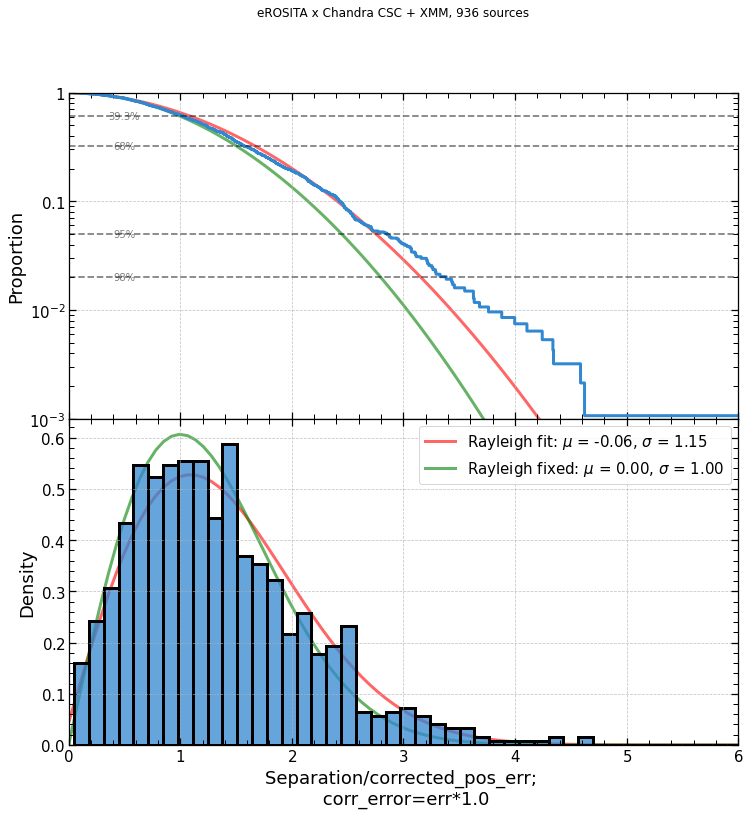

In [21]:
from scripts.cross_match_scripts import rayleigh_plot

rayleigh_plot(ctps_xray, sep_col='final_sep', pos_err_col = 'pos_sigma_2d', plotlabel='eROSITA x Chandra CSC + XMM', xlim=(0, 6))
